In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from model_equations_separate_NC_sep_vmax import *

In [4]:
import run_sensitivity

In [5]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


In [7]:
refdf = pd.read_excel('reference_10cc.xlsx')


In [8]:
dpath = r'C:\Users\oweisberg\OneDrive - University of Haifa\Documents\results\recycle_model\res\29062023'
dpath = r'C:\Users\Osnat\OneDrive - University of Haifa\Documents\results\recycle_model\res\29062023'
os.listdir(dpath)

['param_sensitivity_01072023_df.csv.gz',
 'param_sensitivity_01072023_mse.csv.gz',
 'param_sensitivity_01072023_sum.csv.gz',
 'param_sensitivity_29062023_df.csv.gz',
 'param_sensitivity_29062023_sum.csv.gz']

In [9]:

sum_df = pd.read_csv(os.path.join(dpath,'param_sensitivity_01072023_sum.csv.gz' ))
df =  pd.read_csv(os.path.join(dpath,'param_sensitivity_01072023_df.csv.gz' ))
mse_df = pd.read_csv(os.path.join(dpath,'param_sensitivity_01072023_mse.csv.gz' ))




In [10]:
df.columns

Index(['Unnamed: 0', 'Bp', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC', 'ROS',
       'ABp', 'ABh', 't', 'day', 'Bp[C]', 'ABp[C]', 'ABh[C]', 'run_id'],
      dtype='object')

In [65]:
mse_df.run_id.unique()

array(['param_sensitivity_ponly_MIXO_VmaxONp_6_h-2915878810672552954_mse.csv.gz',
       'param_sensitivity_ponly_FULL_gammaDp_8_h4645402437935127888_mse.csv.gz',
       'param_sensitivity_ponly_MIXO_gammaDp_18_h-720184746978726817_mse.csv.gz',
       'param_sensitivity_ponly_MIXO_EOp_5_h-7247354903986025912_mse.csv.gz',
       'param_sensitivity_ponly_MIXO_VmaxONp_14_h-2842012260047406360_mse.csv.gz',
       'param_sensitivity_ponly_FULL_KABp_7_h1282910774154216004_mse.csv.gz',
       'param_sensitivity_ponly_MIXO_Mp_3_h-3482899955305135607_mse.csv.gz',
       'param_sensitivity_ponly_MIXO_KICp_2_h-8759594774078324652_mse.csv.gz',
       'param_sensitivity_ponly_MIXO_KICp_0_h5057485675366911932_mse.csv.gz',
       'param_sensitivity_ponly_FULL_omegaP_14_h-939277589980610023_mse.csv.gz',
       'param_sensitivity_ponly_FULL_KICp_4_h-7415192576282280273_mse.csv.gz',
       'param_sensitivity_ponly_MIXO_VmaxICp_18_h-3600363634159207039_mse.csv.gz',
       'param_sensitivity_ponly_FULL_EA

In [66]:
mse_df['run_id'] = mse_df.run_id.str.replace(r'_mse.csv.gz','', regex=True)


In [34]:
#       'param_sensitivity_ponly_FULL_decayABp_16_h-6790287481405188016',
sum_df[['sen_param_model', 'idx']] = sum_df.run_id.str.replace('.*_ponly_', '', regex=True
            ).str.replace(r'_h[\-]?\d+','', regex=True
            ).str.rsplit('_', n=1, expand=True)

In [35]:
sum_df[['model', 'sen_param']] = sum_df.sen_param_model.str.split('_', n=1, expand=True)

In [45]:
#       'param_sensitivity_ponly_FULL_decayABp_16_h-6790287481405188016',
mse_df[['sen_param_model', 'idx']] = mse_df.run_id.str.replace('.*_ponly_', '', regex=True
            ).str.replace(r'_mse.csv.gz','', regex=True
            ).str.replace(r'_h[\-]?\d+','', regex=True
            ).str.rsplit('_', n=1, expand=True)

In [46]:
mse_df[['model', 'sen_param']] = mse_df.sen_param_model.str.split('_', n=1, expand=True)

In [47]:
#       'param_sensitivity_ponly_FULL_decayABp_16_h-6790287481405188016',
df[['sen_param_model', 'idx']] = df.run_id.str.replace('.*_ponly_', '', regex=True
            ).str.replace(r'_mse.csv.gz','', regex=True
            ).str.replace(r'_h[\-]?\d+','', regex=True
            ).str.rsplit('_', n=1, expand=True)

In [48]:
df[['model', 'sen_param']] = df.sen_param_model.str.split('_', n=1, expand=True)

In [49]:
sum_df.model.unique(), sum_df.sen_param.unique(), sum_df.idx.unique(), 

(array(['MIXO', 'LEAK', 'FULL', 'MIN'], dtype=object),
 array(['EOp', 'KONp', 'VmaxINp', 'KICp', 'VmaxOCp', 'KINp', 'omegaP',
        'decayABp', 'Mp', 'VmaxICp', 'KABp', 'MABp', 'gammaDp', 'KOCp',
        'E_ROSp', 'VmaxONp', 'EABp', 'ROS_decay'], dtype=object),
 array(['12', '9', '10', '3', '13', '1', '17', '18', '4', '19', '2', '16',
        '5', '8', '0', '11', '15', '6', '7', '14'], dtype=object))

In [52]:
mse_df.model.unique(), mse_df.sen_param.unique(),mse_df.idx.unique(), 

(array(['MIXO', 'FULL', 'MIN', 'LEAK'], dtype=object),
 array(['VmaxONp', 'gammaDp', 'EOp', 'KABp', 'Mp', 'KICp', 'omegaP',
        'VmaxICp', 'EABp', 'KINp', 'KONp', 'KOCp', 'VmaxINp', 'VmaxOCp',
        'E_ROSp', 'decayABp', 'MABp', 'ROS_decay'], dtype=object),
 array(['6', '8', '18', '5', '14', '7', '3', '2', '0', '4', '17', '13',
        '12', '15', '19', '16', '9', '11', '1', '10'], dtype=object))

In [53]:
df.model.unique(), df.sen_param.unique(),df.idx.unique(), 

(array(['LEAK', 'FULL', 'MIXO', 'MIN'], dtype=object),
 array(['VmaxINp', 'gammaDp', 'VmaxICp', 'VmaxONp', 'Mp', 'KOCp', 'omegaP',
        'EOp', 'KICp', 'KINp', 'E_ROSp', 'decayABp', 'KONp', 'MABp',
        'VmaxOCp', 'EABp', 'KABp', 'ROS_decay'], dtype=object),
 array(['18', '1', '11', '2', '8', '16', '6', '5', '4', '0', '19', '7',
        '17', '10', '12', '9', '14', '13', '15', '3'], dtype=object))

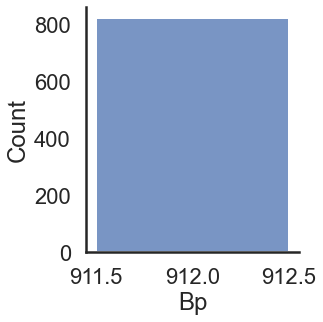

In [22]:
sns.displot(df.groupby(['run_id' ]).Bp.count().reset_index().sort_values('Bp').Bp)
plt.show()

In [54]:
mse_df.sort_values('MSE').groupby('model').head(7).sort_values(['model', 'MSE'])[[]]

,Unnamed: 0,Sample,id,full name,Group,compare_points,MSE,run_id,sen_param_model,idx,model,sen_param
2439,0,1A0,1,Axenic,Axenic,74.0,94.627027,param_sensitivity_ponly_FULL_E_ROSp_17_h-89855...,FULL_E_ROSp,17,FULL,E_ROSp
1128,0,1A0,1,Axenic,Axenic,74.0,100.557573,param_sensitivity_ponly_FULL_omegaP_17_h-37346...,FULL_omegaP,17,FULL,omegaP
171,0,1A0,1,Axenic,Axenic,74.0,106.756449,param_sensitivity_ponly_FULL_E_ROSp_16_h427638...,FULL_E_ROSp,16,FULL,E_ROSp
1917,0,1A0,1,Axenic,Axenic,74.0,109.451631,param_sensitivity_ponly_FULL_omegaP_16_h-56880...,FULL_omegaP,16,FULL,omegaP
2440,1,1B0,1,Axenic,Axenic,74.0,109.747346,param_sensitivity_ponly_FULL_E_ROSp_17_h-89855...,FULL_E_ROSp,17,FULL,E_ROSp
2441,2,1C0,1,Axenic,Axenic,74.0,112.809696,param_sensitivity_ponly_FULL_E_ROSp_17_h-89855...,FULL_E_ROSp,17,FULL,E_ROSp
172,1,1B0,1,Axenic,Axenic,74.0,115.202888,param_sensitivity_ponly_FULL_E_ROSp_16_h427638...,FULL_E_ROSp,16,FULL,E_ROSp
813,0,1A0,1,Axenic,Axenic,74.0,160.529578,param_sensitivity_ponly_LEAK_VmaxINp_1_h825959...,LEAK_VmaxINp,1,LEAK,VmaxINp
815,2,1C0,1,Axenic,Axenic,74.0,181.041490,param_sensitivity_ponly_LEAK_VmaxINp_1_h825959...,LEAK_VmaxINp,1,LEAK,VmaxINp
814,1,1B0,1,Axenic,Axenic,74.0,185.246275,param_sensitivity_ponly_LEAK_VmaxINp_1_h825959...,LEAK_VmaxINp,1,LEAK,VmaxINp


In [56]:
mse_df.nsmallest(columns='MSE', n=20)

,Unnamed: 0,Sample,id,full name,Group,compare_points,MSE,run_id,sen_param_model,idx,model,sen_param
2307,0,1A0,1,Axenic,Axenic,74.0,49.221748,param_sensitivity_ponly_MIN_Mp_7_h-39004178708...,MIN_Mp,7,MIN,Mp
1251,0,1A0,1,Axenic,Axenic,74.0,54.667101,param_sensitivity_ponly_MIN_KINp_19_h743791071...,MIN_KINp,19,MIN,KINp
1452,0,1A0,1,Axenic,Axenic,74.0,54.667570,param_sensitivity_ponly_MIN_KICp_0_h4644819937...,MIN_KICp,0,MIN,KICp
2322,0,1A0,1,Axenic,Axenic,74.0,54.667616,param_sensitivity_ponly_MIN_VmaxINp_1_h8123056...,MIN_VmaxINp,1,MIN,VmaxINp
1458,0,1A0,1,Axenic,Axenic,74.0,54.667865,param_sensitivity_ponly_MIN_KICp_1_h5779443188...,MIN_KICp,1,MIN,KICp
276,0,1A0,1,Axenic,Axenic,74.0,54.668242,param_sensitivity_ponly_MIN_KICp_2_h7470809639...,MIN_KICp,2,MIN,KICp
675,0,1A0,1,Axenic,Axenic,74.0,54.668722,param_sensitivity_ponly_MIN_KICp_3_h6103158055...,MIN_KICp,3,MIN,KICp
84,0,1A0,1,Axenic,Axenic,74.0,54.669334,param_sensitivity_ponly_MIN_KICp_4_h-428775109...,MIN_KICp,4,MIN,KICp
426,0,1A0,1,Axenic,Axenic,74.0,54.669520,param_sensitivity_ponly_MIN_KINp_18_h-63077074...,MIN_KINp,18,MIN,KINp
315,0,1A0,1,Axenic,Axenic,74.0,54.670114,param_sensitivity_ponly_MIN_KICp_5_h3084452923...,MIN_KICp,5,MIN,KICp


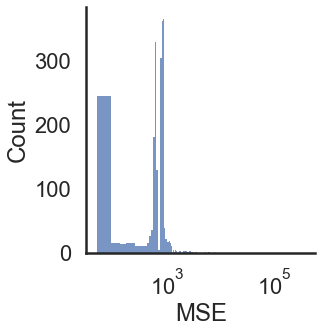

In [57]:
sns.displot(mse_df.MSE,)
#sns.distplot(sum_df.p_err, label='P')
#sns.distplot(sum_df.error, label='Total')
#plt.legend()
plt.xscale('log')
plt.show()


In [58]:
df.min()

Unnamed: 0                                                         0
Bp                                                              -0.0
DON                                                          0.00163
RDON                                                   -15697.391936
DIN                                                     -4860.548432
DOC                                                         0.016086
RDOC                                                   -109881.74355
DIC                                                          0.00892
ROS                                                         0.049402
ABp                                                              0.0
ABh                                                              0.0
t                                                                0.0
day                                                              0.0
Bp[C]                                                           -0.0
ABp[C]                            

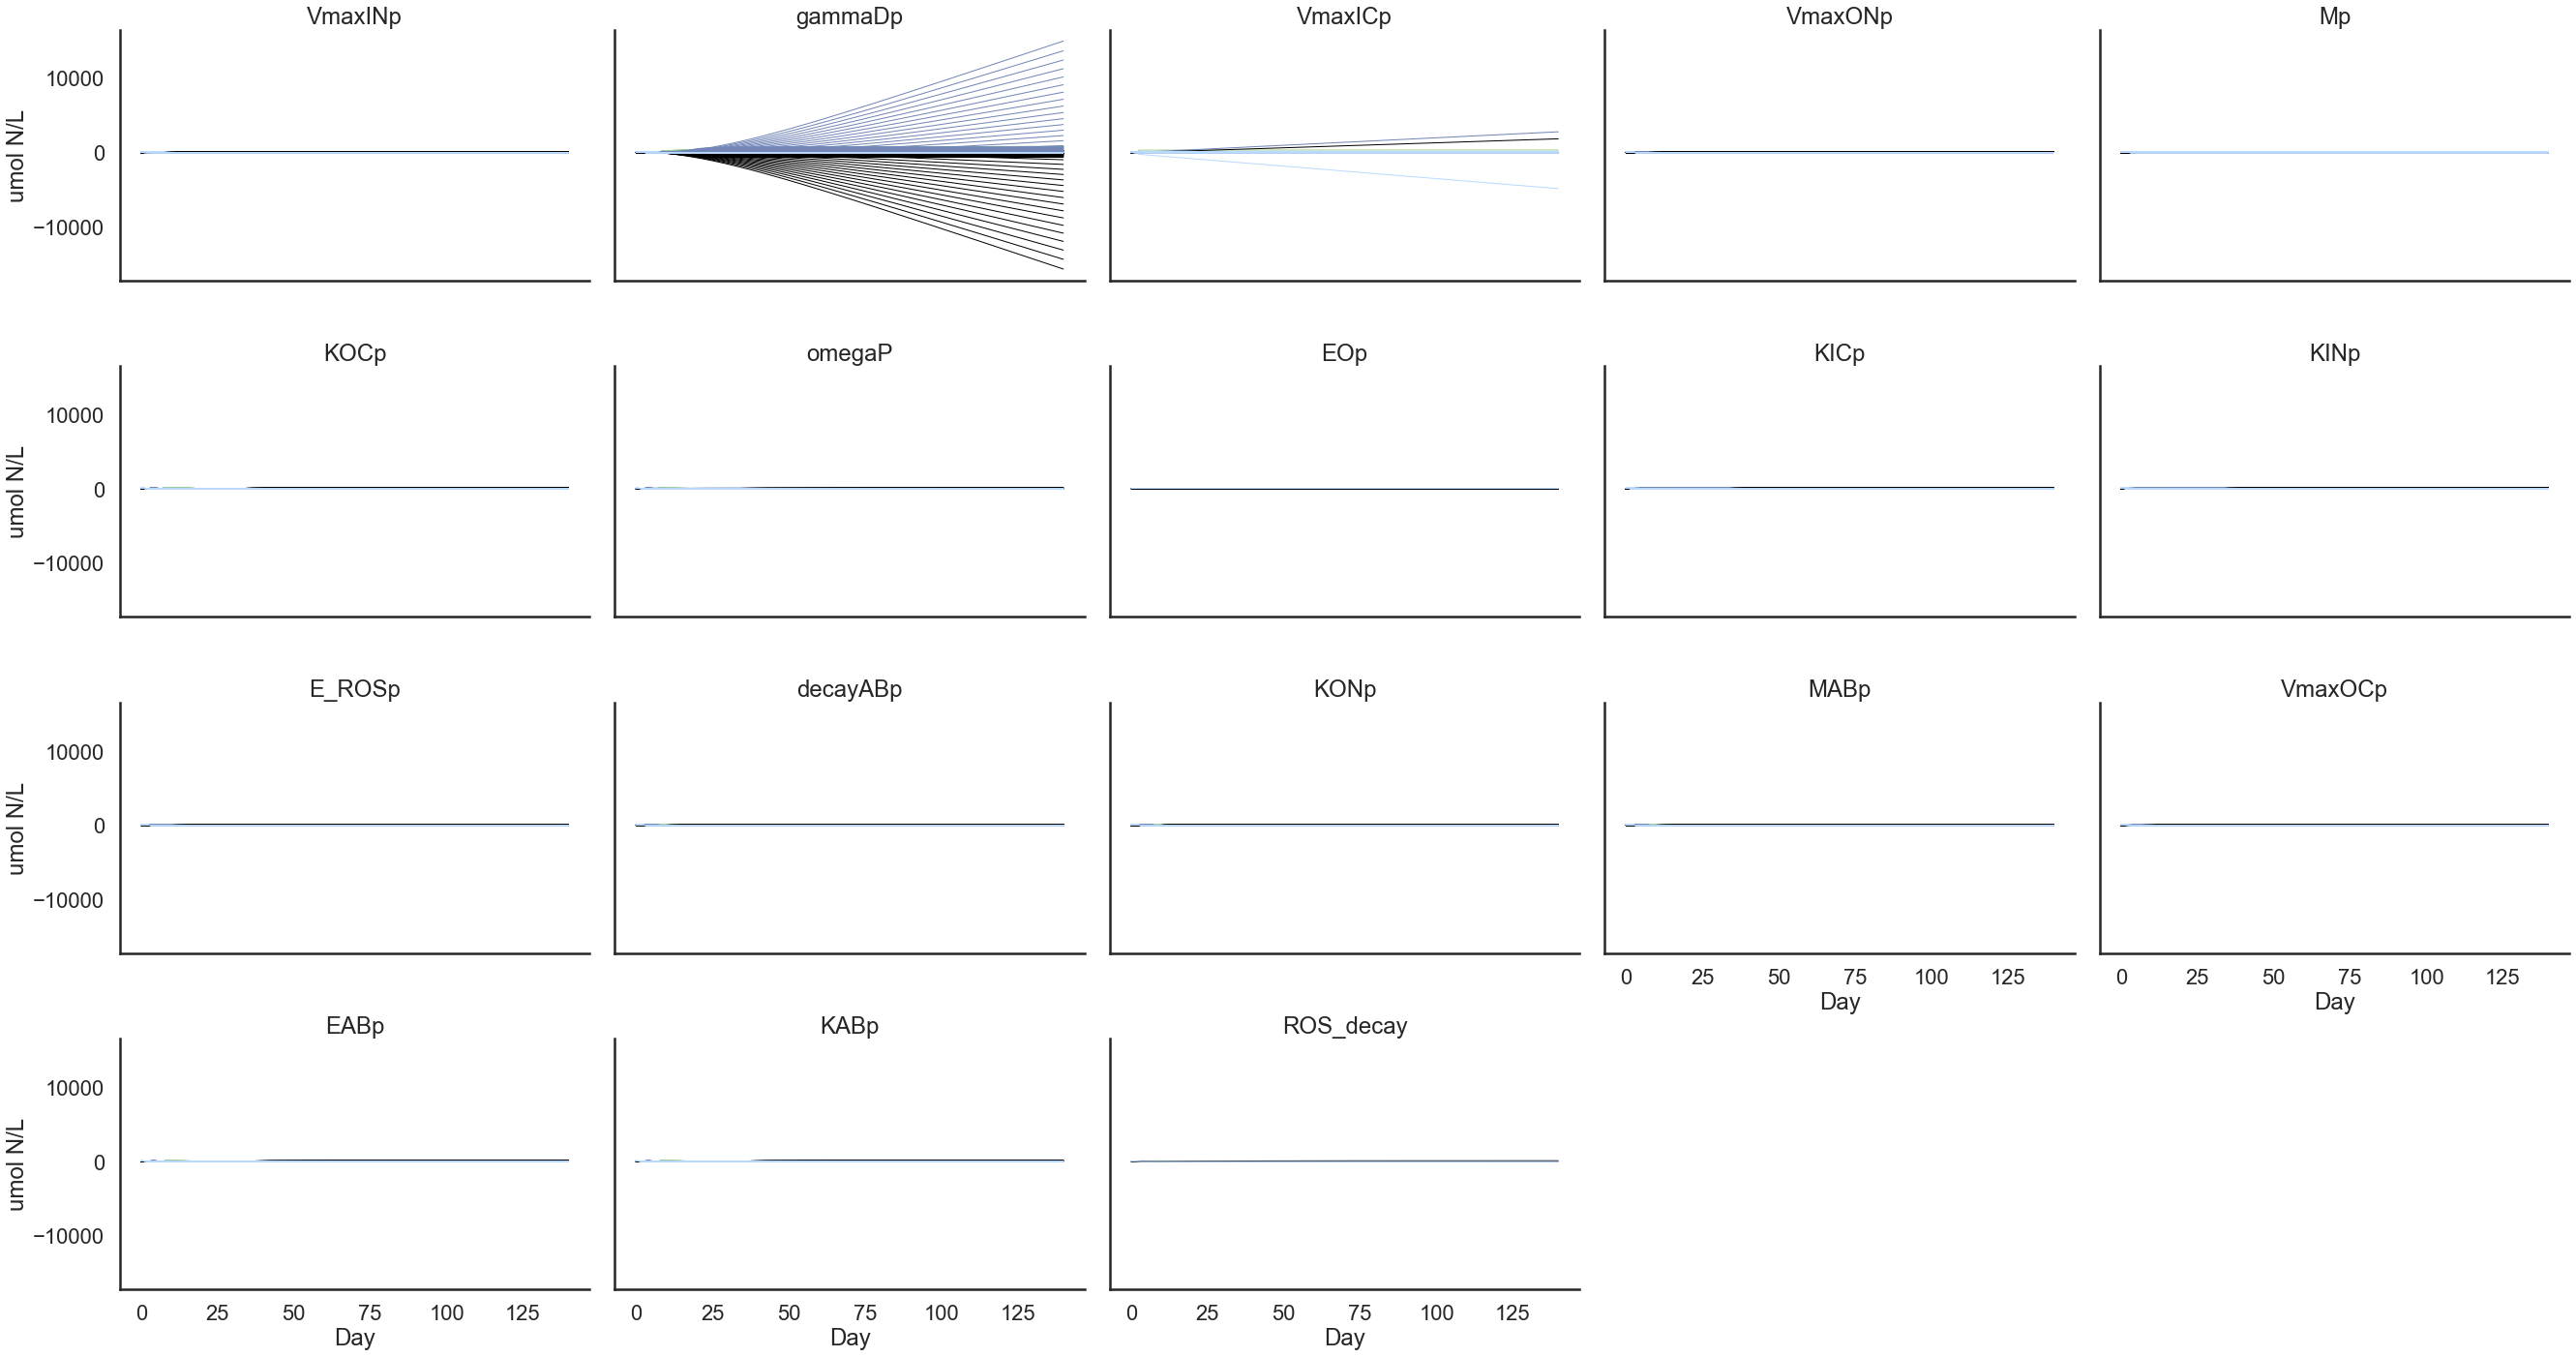

In [59]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't', 'sen_param', 'model', ], value_vars=pnorder)                            
mdf2['Day'] =mdf2['day'].round(5)
#mdf2['param_name'] = '$' + mdf2['sen_param'] + '$'
mdf2['param_name'] =  mdf2['sen_param'] 

#mdf2 = mdf2.loc[~mdf2['run_id'].isin(problematic_run_ids)]


g = sns.relplot(
    data=mdf2, 
    x='Day', y='value',
    hue='variable', hue_order=ccnorder, palette=ccnpalette,
    estimator=None, units='run_id',
    col='sen_param', #col_order= paramorder,
    col_wrap=5,
    kind='line', lw=1,
    aspect=1.5, legend=False,
)
    


#g.map_dataframe(pp)


g.set(ylabel='umol N/L')
g.set_titles(col_template='{col_name}',)
plt.show()

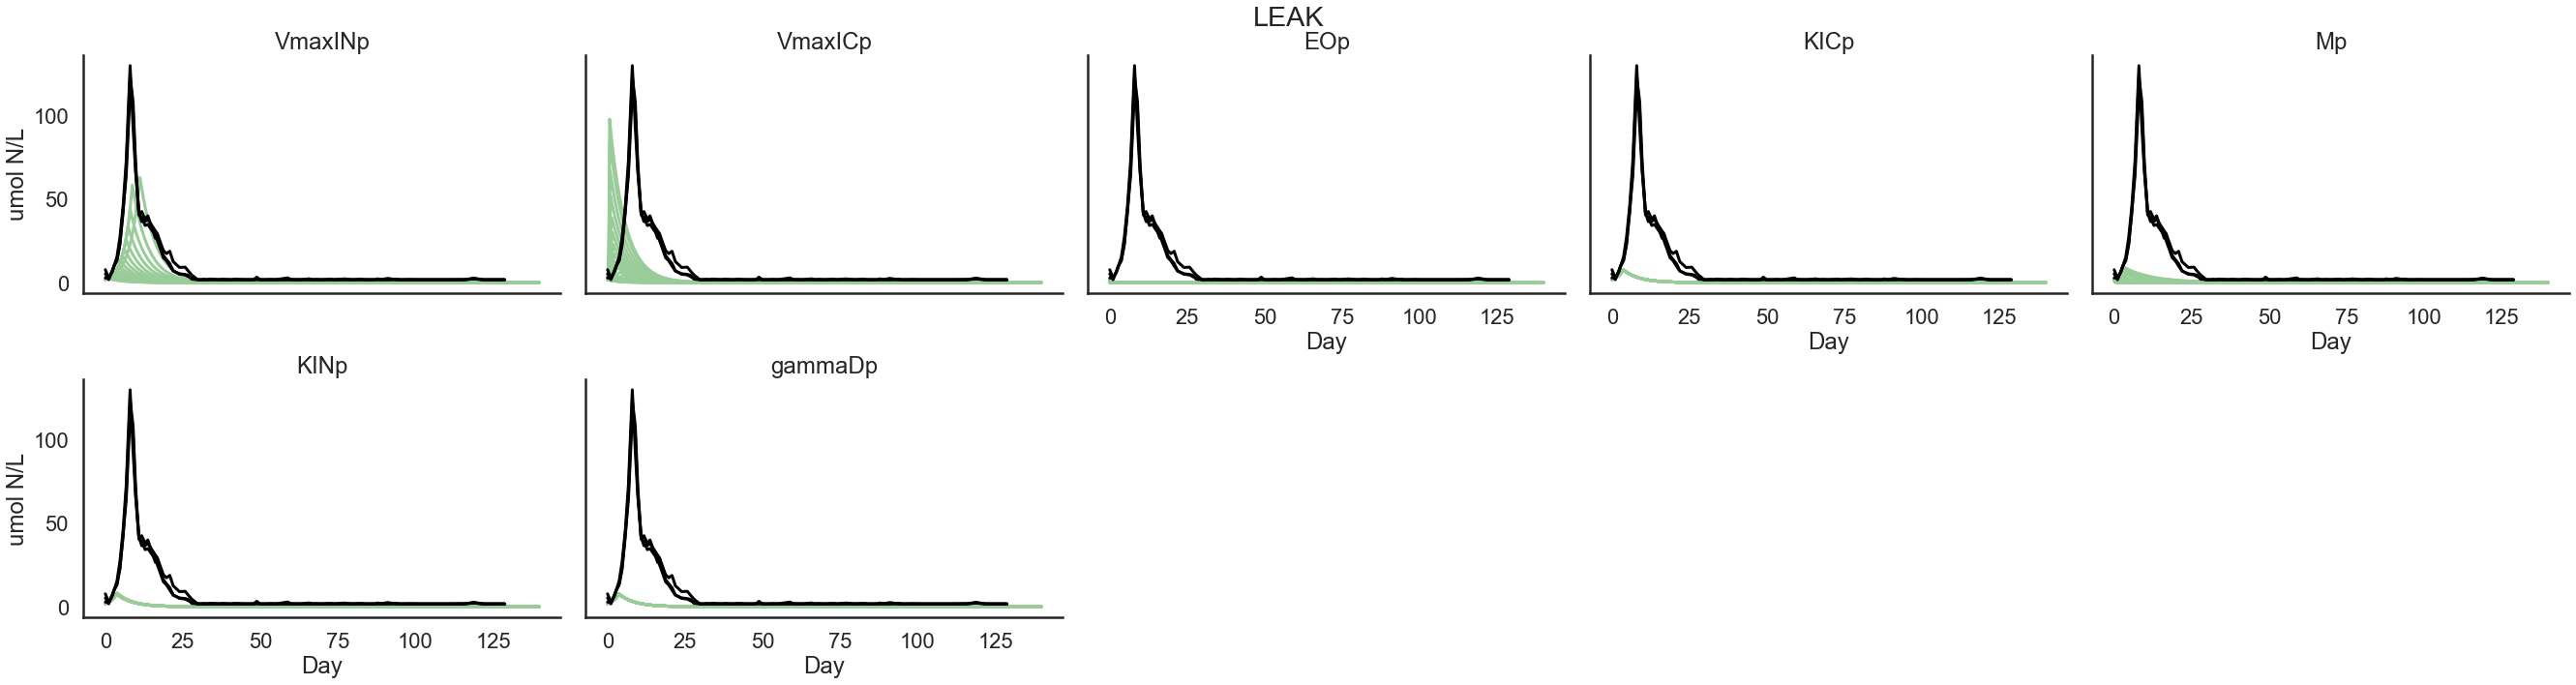

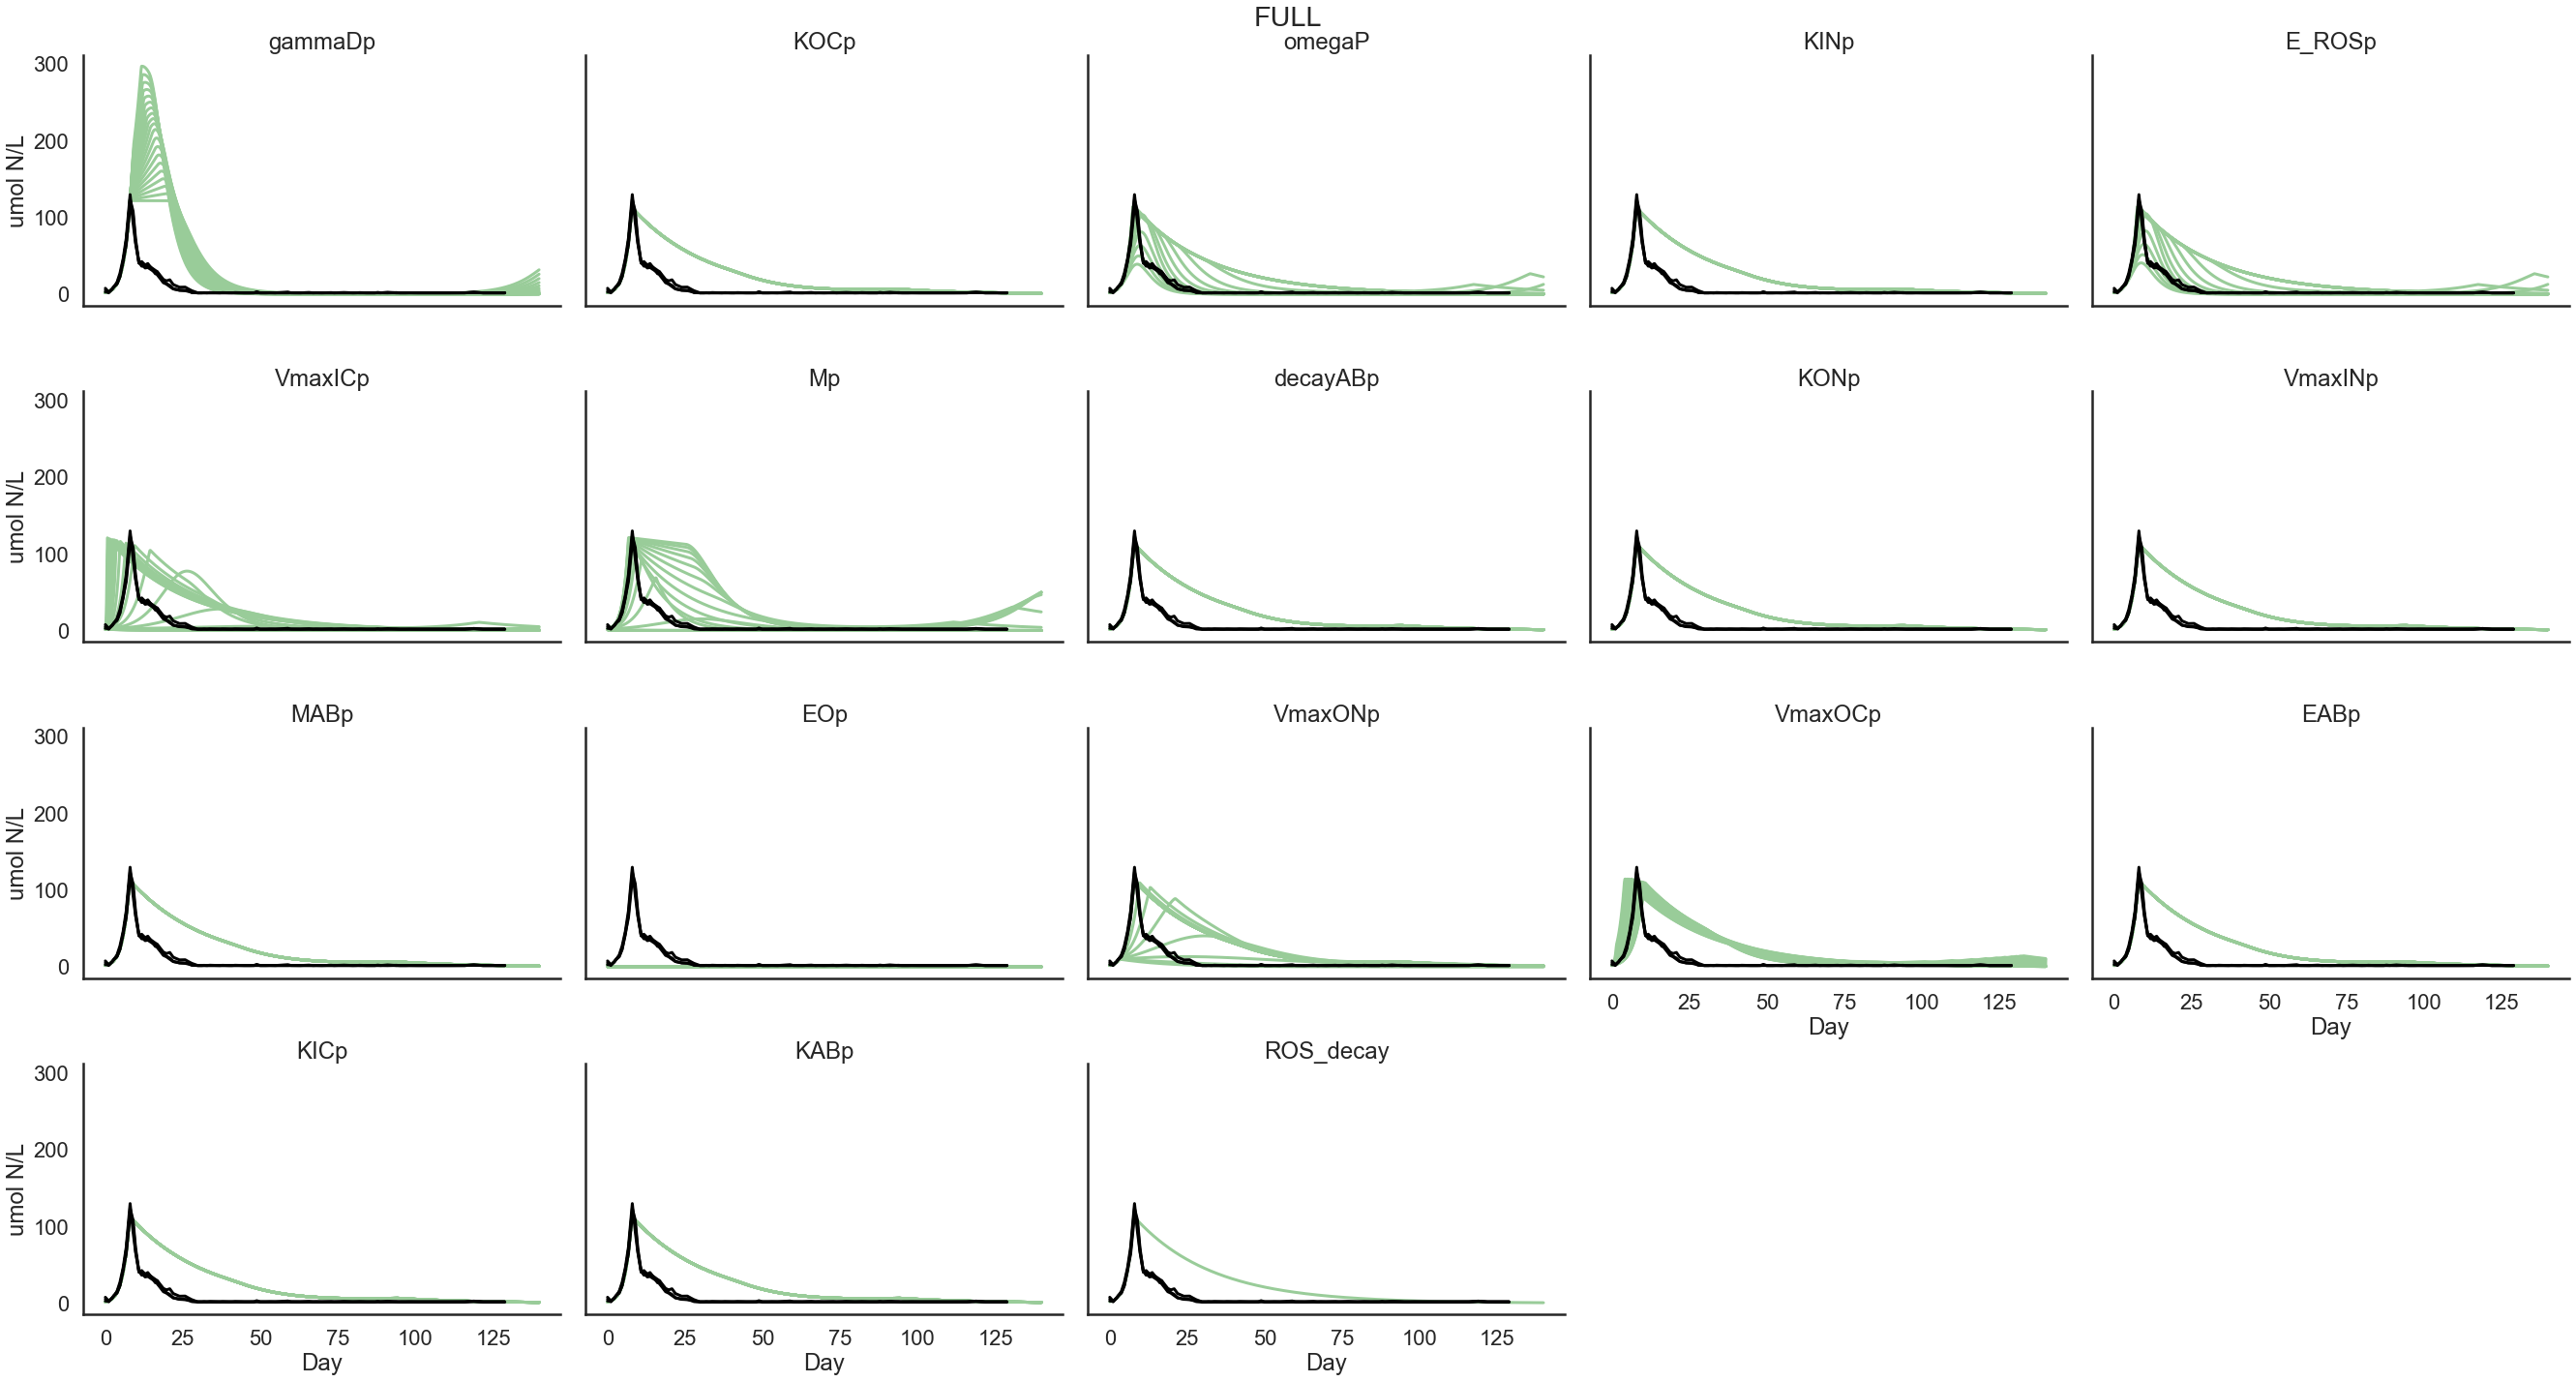

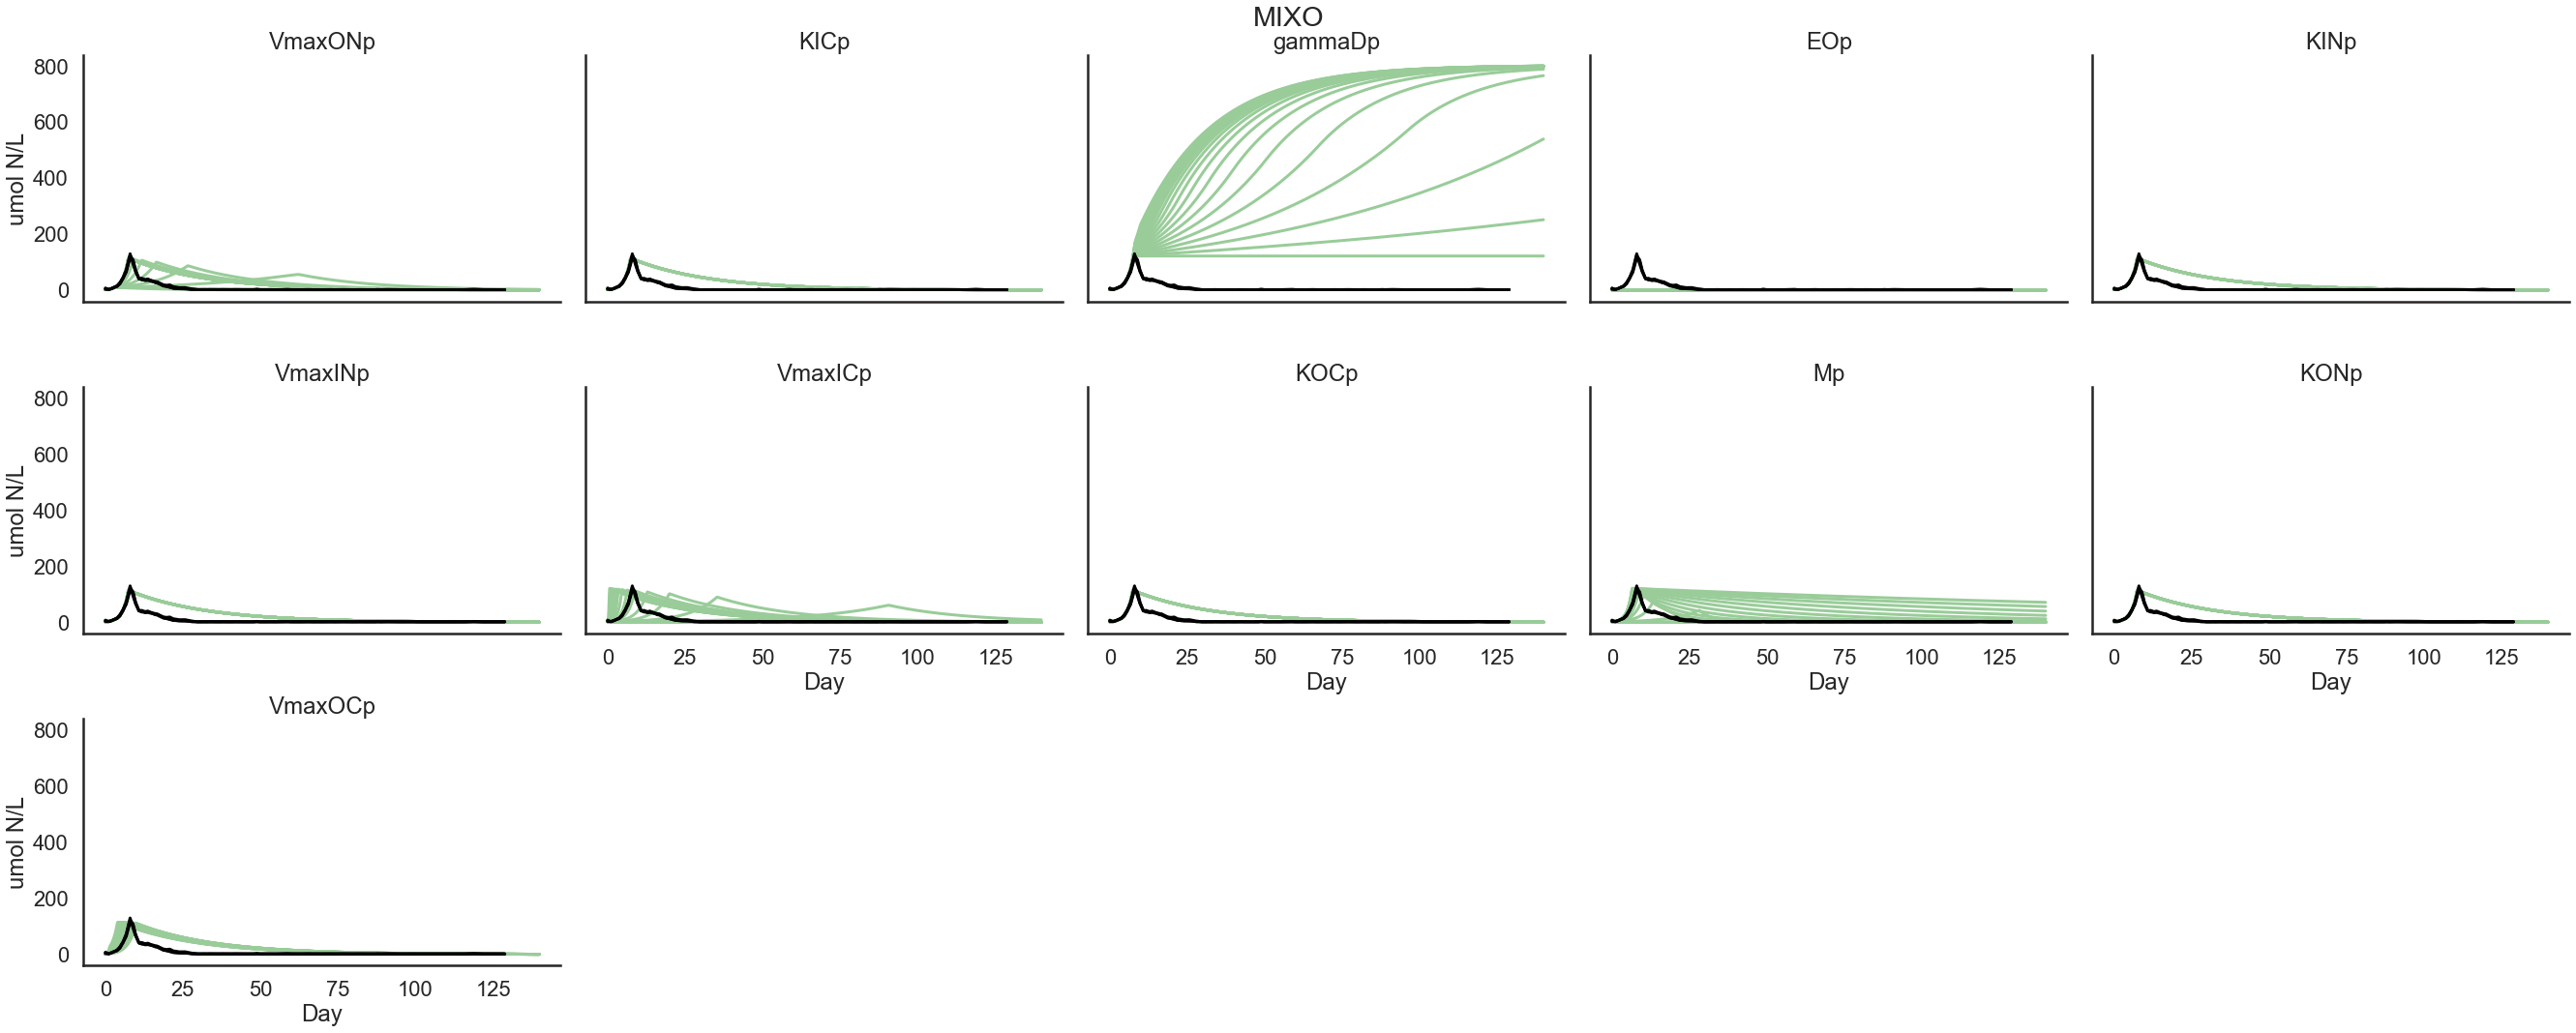

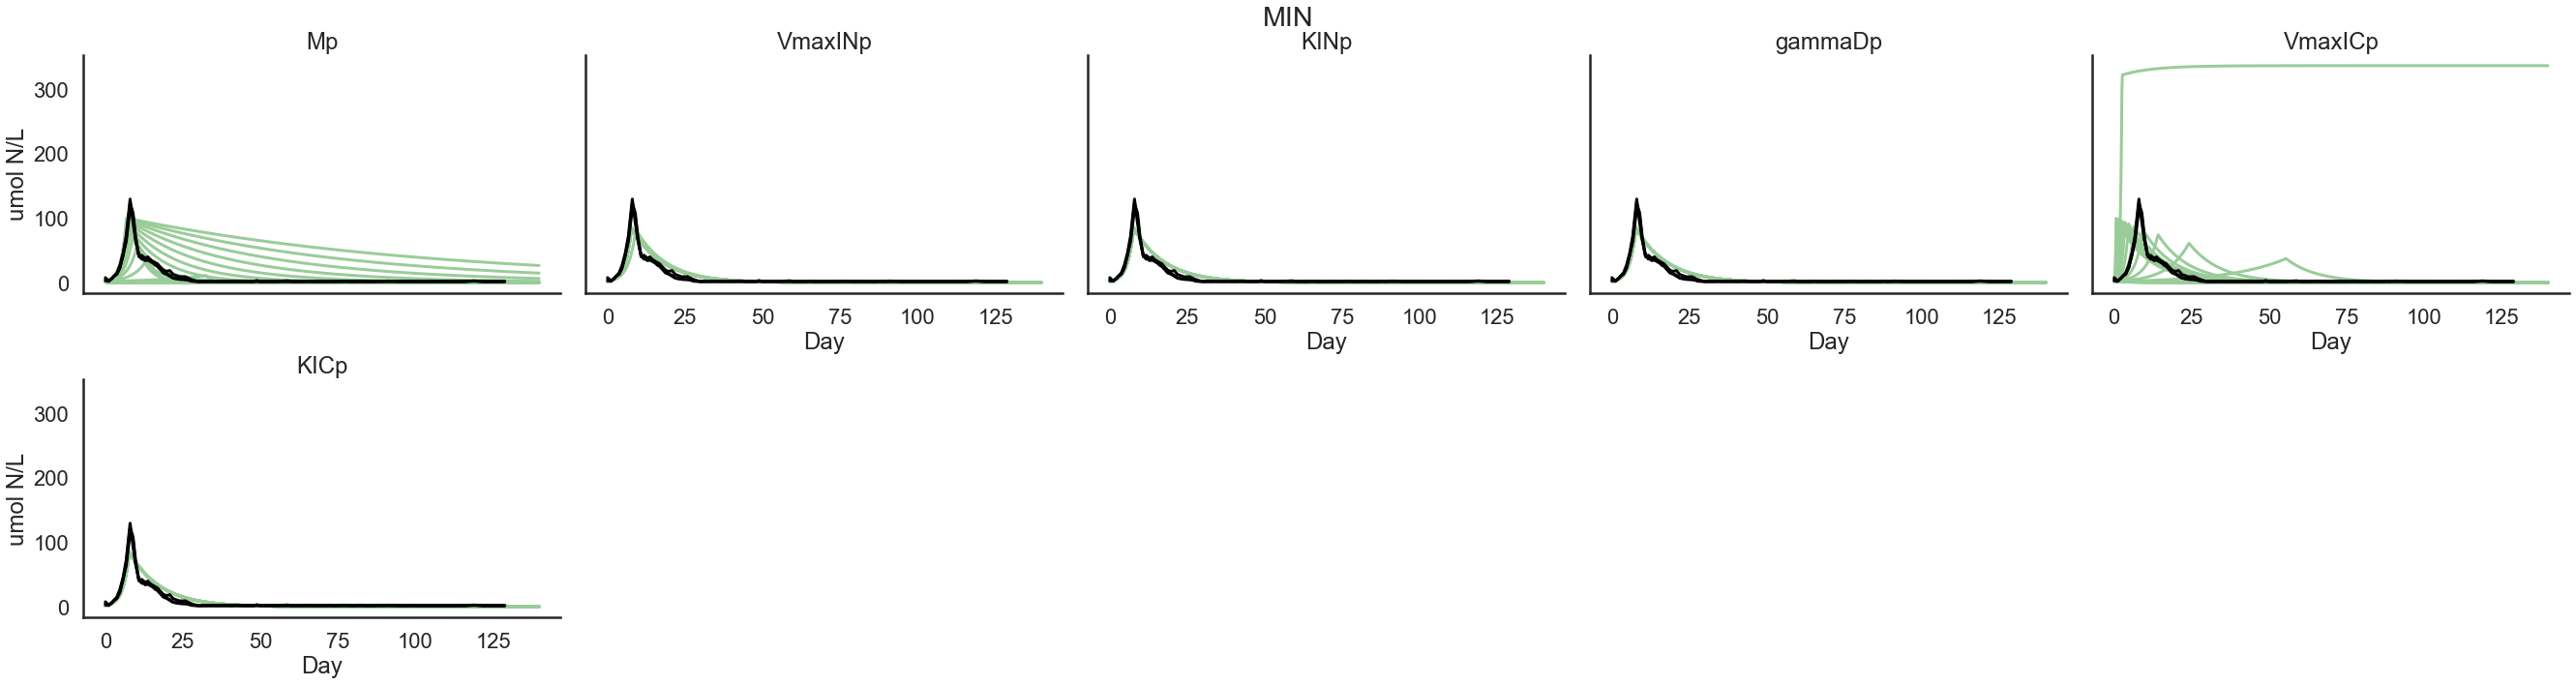

In [60]:
for m in df.model.unique():
    mdf2 = df.loc[df.model.isin([m])].melt(id_vars=['run_id', 'day', 't', 'sen_param', 'model', ], value_vars=['Bp'])                            
    mdf2['Day'] =mdf2['day'].round(5)
    #mdf2['param_name'] = '$' + mdf2['sen_param'] + '$'
    mdf2['param_name'] =  mdf2['sen_param'] 

    #mdf2 = mdf2.loc[~mdf2['run_id'].isin(problematic_run_ids)]


    g = sns.relplot(
        data=mdf2, 
        x='Day', y='value',
        hue='variable', palette=[PCOLOR], #hue_order=ccnorder, palette=ccnpalette,
        estimator=None, units='run_id',
        col='sen_param', #col_order= paramorder,
        col_wrap=5,
        kind='line', #lw=1,
        aspect=1.5, legend=False,
    )

    for ax in g.axes:
        sns.lineplot(
            data=refdf.loc[refdf.Group.isin(['Axenic'])],
            x='day', y='ref_Bp',
            estimator=None, units='Sample',
            color='black', ax=ax
        )

    #g.map_dataframe(pp)


    g.set(ylabel='umol N/L')
    g.set_titles(col_template='{col_name}',)
    plt.suptitle(m, y=1)
    plt.show()

In [61]:
mse_df.loc[mse_df.model.isin(['MIN'])].drop_duplicates(['run_id']).groupby (['sen_param', 'model'])['idx'].count()

sen_param  model
KICp       MIN      20
KINp       MIN      20
Mp         MIN      20
VmaxICp    MIN      20
VmaxINp    MIN      20
gammaDp    MIN      20
Name: idx, dtype: int64

In [67]:
lowest_ids = mse_df.nsmallest(columns='MSE', n=10)['run_id']

KeyboardInterrupt: 

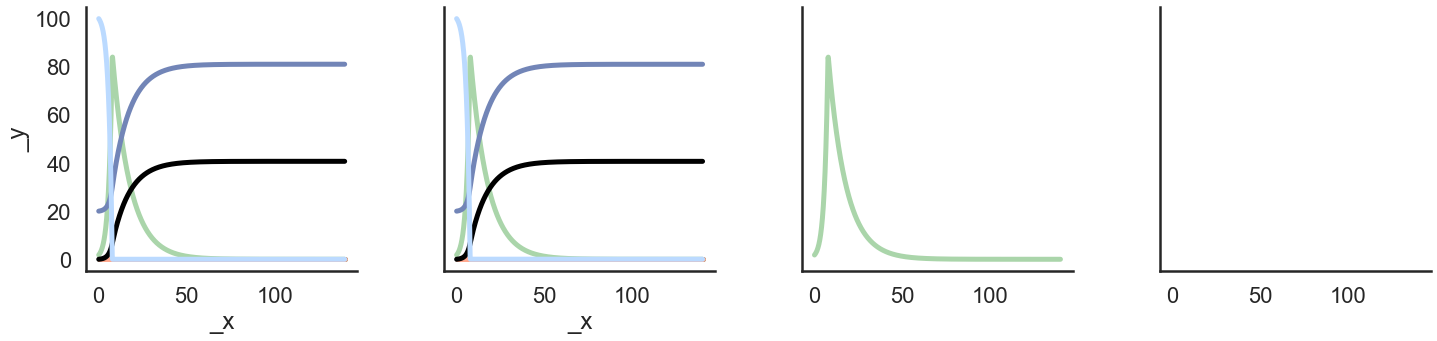

In [70]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't', 'sen_param', 'model', ], value_vars=pnorder)                            
mdf2['Day'] =mdf2['day'].round(5)
#mdf2['param_name'] = '$' + mdf2['sen_param'] + '$'
mdf2['param_name'] =  mdf2['sen_param'] 

g = sns.relplot(
    data=mdf2.loc[mdf2.run_id.isin(lowest_ids)], 
    x='day', y='value',
    hue='variable', hue_order=pnorder, palette=pnpalette,
    #estimator=None, units='run_id',
    col='sen_param', #col_order=lowest_ids, 
    col_wrap=5,
    kind='line', lw=5,
)


def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf.loc[refdf.Group.isin(['Axenic'])], x='day', y='ref_Bp', ax=ax, s=100, legend=False, color=PCOLOR)
    #sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)

g.map(pp)
g.set(ylabel='umol N/L')
g.set_titles(col_template='{col_name}',)



In [35]:
plt.show()

In [64]:
lowest_ids

2307    param_sensitivity_ponly_MIN_Mp_7_h-39004178708...
1251    param_sensitivity_ponly_MIN_KINp_19_h743791071...
1452    param_sensitivity_ponly_MIN_KICp_0_h4644819937...
2322    param_sensitivity_ponly_MIN_VmaxINp_1_h8123056...
1458    param_sensitivity_ponly_MIN_KICp_1_h5779443188...
276     param_sensitivity_ponly_MIN_KICp_2_h7470809639...
675     param_sensitivity_ponly_MIN_KICp_3_h6103158055...
84      param_sensitivity_ponly_MIN_KICp_4_h-428775109...
426     param_sensitivity_ponly_MIN_KINp_18_h-63077074...
315     param_sensitivity_ponly_MIN_KICp_5_h3084452923...
Name: run_id, dtype: object

In [37]:
ponly_sum_df

,Unnamed: 0,Mh,Mp,gammaDp,gammaDh,Rp,Rh,EOp,EIp,EOh,...,bh,run_id,h_err,p_err,error,logerror,sen_param_model,idx,model,sen_param
1,0,0.000001,1.157407e-06,0.6,0.6,7.0,4.5,0.000001,0.0,0.000001,...,0.01,param_sensitivity_ponly_MIXO_PRO_MIXO_VmaxICp_...,NaN,NaN,NaN,NaN,MIXO_VmaxICp,4,MIXO,VmaxICp
2,0,0.000001,1.664873e-07,0.6,0.6,7.0,4.5,0.000001,0.0,0.000001,...,0.01,param_sensitivity_ponly_FULL_PRO_FULL_Mp_1_h59...,NaN,NaN,NaN,NaN,FULL_Mp,1,FULL,Mp
4,0,0.000001,1.157407e-06,0.6,0.6,7.0,4.5,0.000000,0.0,0.000000,...,0.01,param_sensitivity_ponly_MIN_PRO_MIN_VmaxINp_5_...,NaN,NaN,NaN,NaN,MIN_VmaxINp,5,MIN,VmaxINp
5,0,0.000001,1.157407e-06,0.6,0.6,7.0,4.5,0.000001,0.0,0.000001,...,0.01,param_sensitivity_ponly_MIXO_PRO_MIXO_KINp_0_h...,NaN,NaN,NaN,NaN,MIXO_KINp,0,MIXO,KINp
10,0,0.000001,2.703381e-05,0.6,0.6,7.0,4.5,0.000001,0.0,0.000001,...,0.01,param_sensitivity_ponly_LEAK_PRO_LEAK_Mp_15_h-...,NaN,NaN,NaN,NaN,LEAK_Mp,15,LEAK,Mp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,0,0.000001,1.157407e-06,0.6,0.6,7.0,4.5,0.000001,0.0,0.000001,...,0.01,param_sensitivity_ponly_MIXO_PRO_MIXO_KICp_11_...,NaN,NaN,NaN,NaN,MIXO_KICp,11,MIXO,KICp
2008,0,0.000001,1.157407e-06,0.6,0.6,7.0,4.5,0.000001,0.0,0.000001,...,0.01,param_sensitivity_ponly_FULL_PRO_FULL_VmaxICp_...,NaN,NaN,NaN,NaN,FULL_VmaxICp,1,FULL,VmaxICp
2012,0,0.000001,1.157407e-06,0.6,0.6,7.0,4.5,0.000001,0.0,0.000001,...,0.01,param_sensitivity_ponly_FULL_PRO_FULL_omegaP_1...,NaN,NaN,NaN,NaN,FULL_omegaP,19,FULL,omegaP
2015,0,0.000001,1.157407e-06,0.6,0.6,7.0,4.5,0.000001,0.0,0.000001,...,0.01,param_sensitivity_ponly_FULL_PRO_FULL_KONp_2_h...,NaN,NaN,NaN,NaN,FULL_KONp,2,FULL,KONp


In [38]:
ponly_sum_df.columns

Index(['Unnamed: 0', 'Mh', 'Mp', 'gammaDp', 'gammaDh', 'Rp', 'Rh', 'EOp',
       'EIp', 'EOh', 'EIh', 'KONp', 'KINp', 'KOCp', 'KICp', 'KONh', 'KINh',
       'KOCh', 'KICh', 'VmaxONp', 'VmaxINp', 'VmaxOCp', 'VmaxICp', 'VmaxONh',
       'VmaxINh', 'VmaxOCh', 'VmaxICh', 'Oh', 'Op', 'E_ROSp', 'E_ROSh',
       'VmaxROSh', 'K_ROSh', 'omegaP', 'omegaH', 'ROS_decay', 'KABp', 'KABh',
       'EABp', 'EABh', 'decayABh', 'decayABp', 'MABp', 'MABh', 'r0p', 'r0h',
       'bp', 'bh', 'run_id', 'h_err', 'p_err', 'error', 'logerror',
       'sen_param_model', 'idx', 'model', 'sen_param'],
      dtype='object')

In [72]:
params_list = ['Mh', 'Mp', 'gammaDp', 'gammaDh', 'Rp', 'Rh', 'EOp',
       'EIp', 'EOh', 'EIh', 'KONp', 'KINp', 'KOCp', 'KICp', 'KONh', 'KINh',
       'KOCh', 'KICh', 'VmaxONp', 'VmaxINp', 'VmaxOCp', 'VmaxICp', 'VmaxONh',
       'VmaxINh', 'VmaxOCh', 'VmaxICh', 'Oh', 'Op', 'E_ROSp', 'E_ROSh',
       'VmaxROSh', 'K_ROSh', 'omegaP', 'omegaH', 'ROS_decay', 'KABp', 'KABh',
       'EABp', 'EABh', 'decayABh', 'decayABp', 'MABp', 'MABh', 'r0p', 'r0h',
       'bp', 'bh',]
param_values_df = sum_df.melt(id_vars='run_id', value_vars=params_list, var_name='sen_param', value_name='sen_param_value')

In [73]:
mse_df = pd.merge(mse_df, param_values_df, on=['run_id', 'sen_param'], how='left')

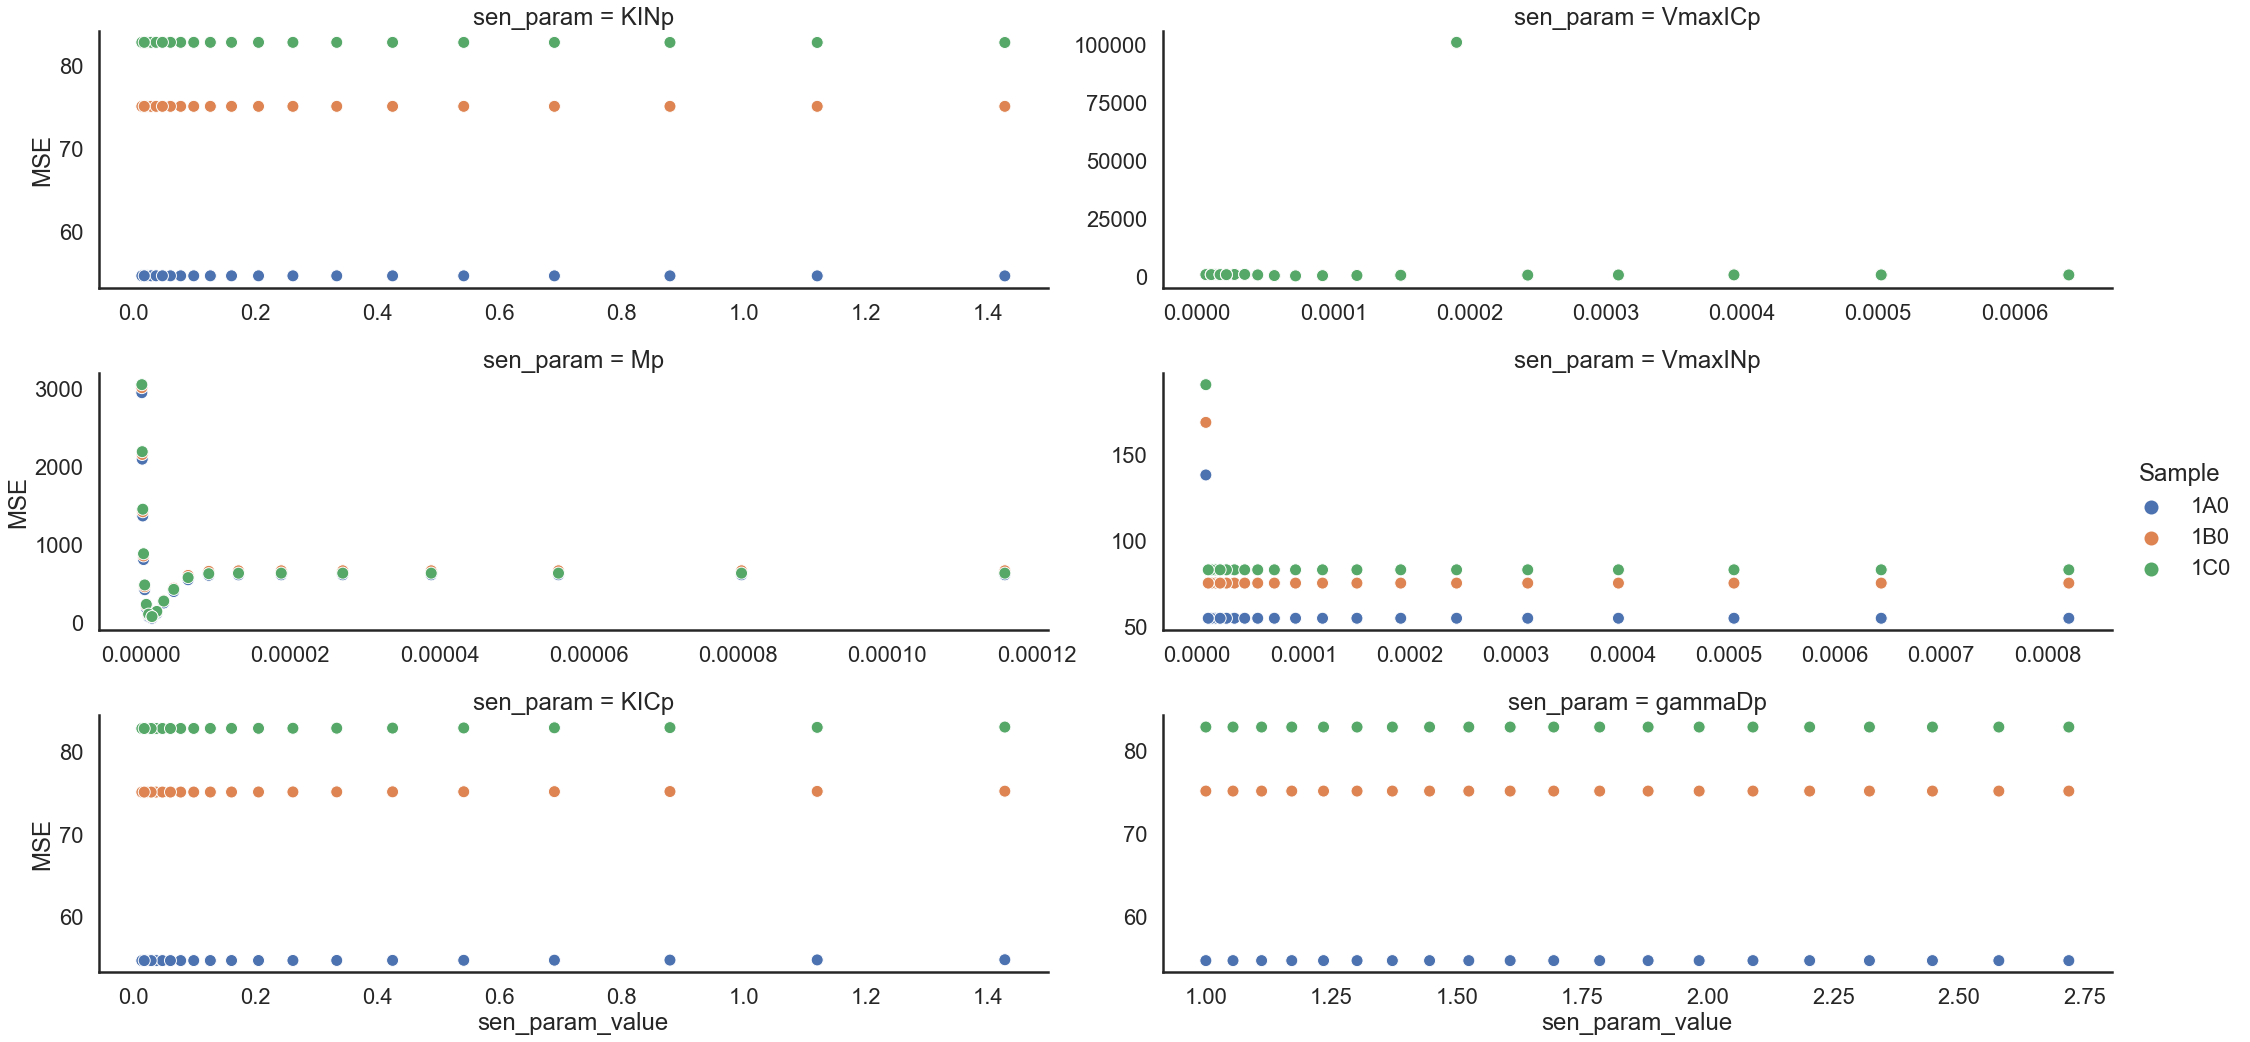

In [75]:
sns.relplot(
    data=mse_df.loc[mse_df.model.isin(['MIN'])], 
    x='sen_param_value', y='MSE', #log_scale=(True,False), 
    col='sen_param', col_wrap=2,
    hue='Sample', 
    aspect=3,
    facet_kws={'sharey': False, 'sharex': False}, #common_bins=False, 
)#.set(xscale='log')

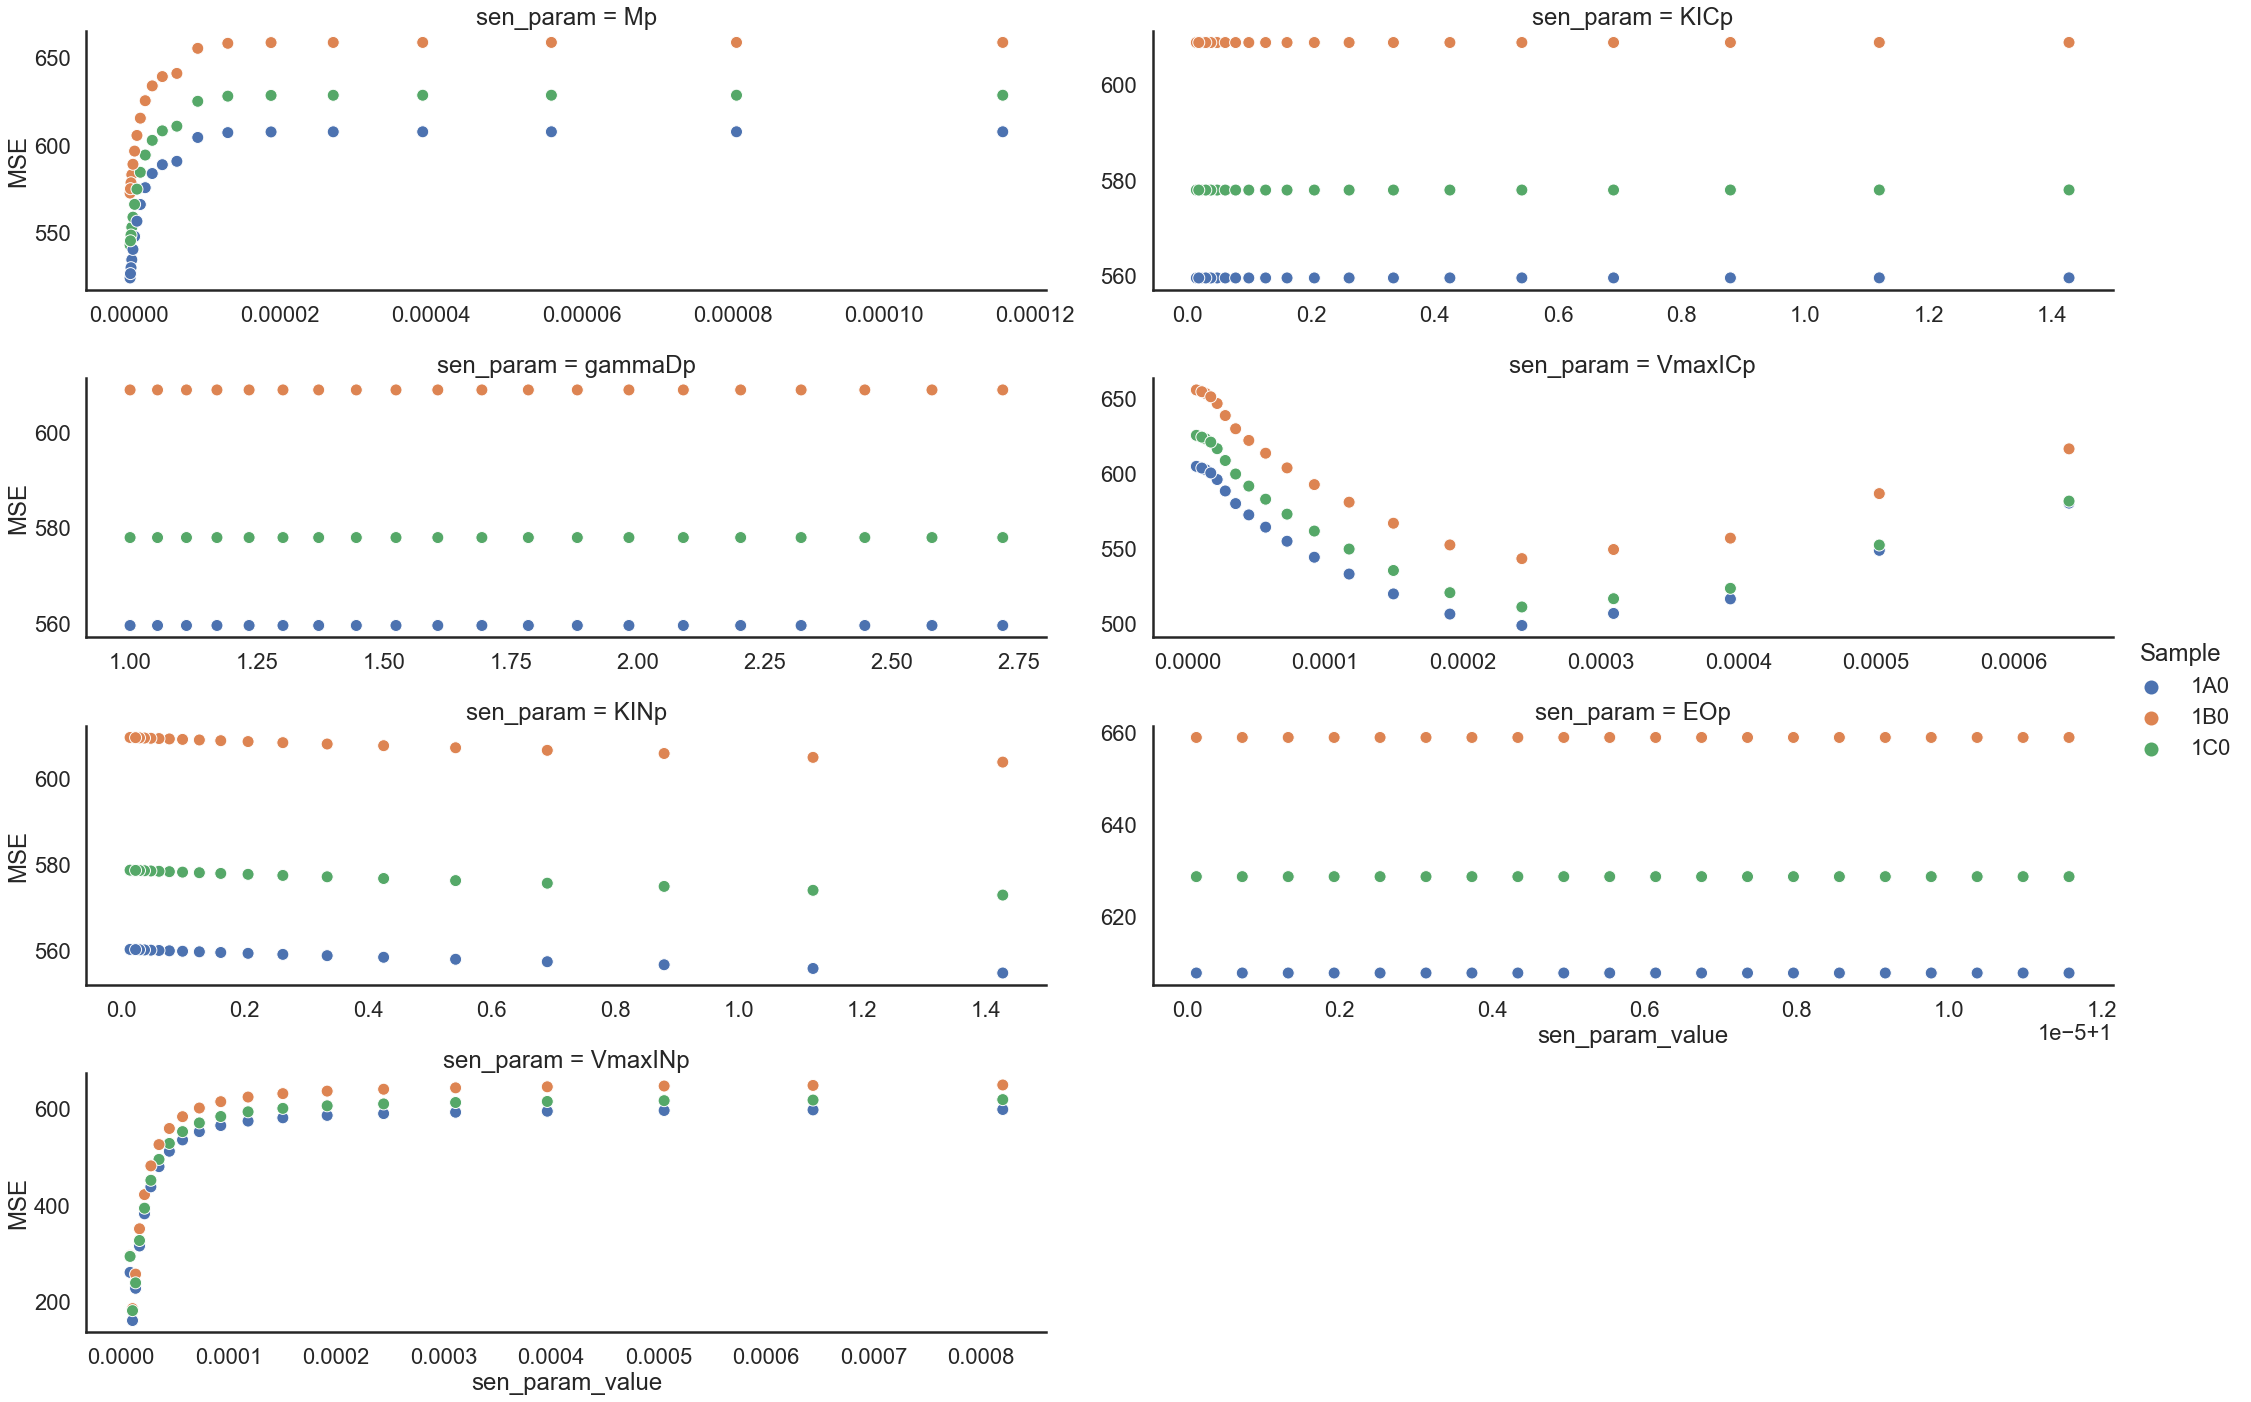

In [76]:
sns.relplot(
    data=mse_df.loc[mse_df.model.isin(['LEAK'])], 
    x='sen_param_value', y='MSE', #log_scale=(True,False), 
    col='sen_param', col_wrap=2,
    hue='Sample', 
    aspect=3,
    facet_kws={'sharey': False, 'sharex': False}, #common_bins=False, 
)#.set(xscale='log')

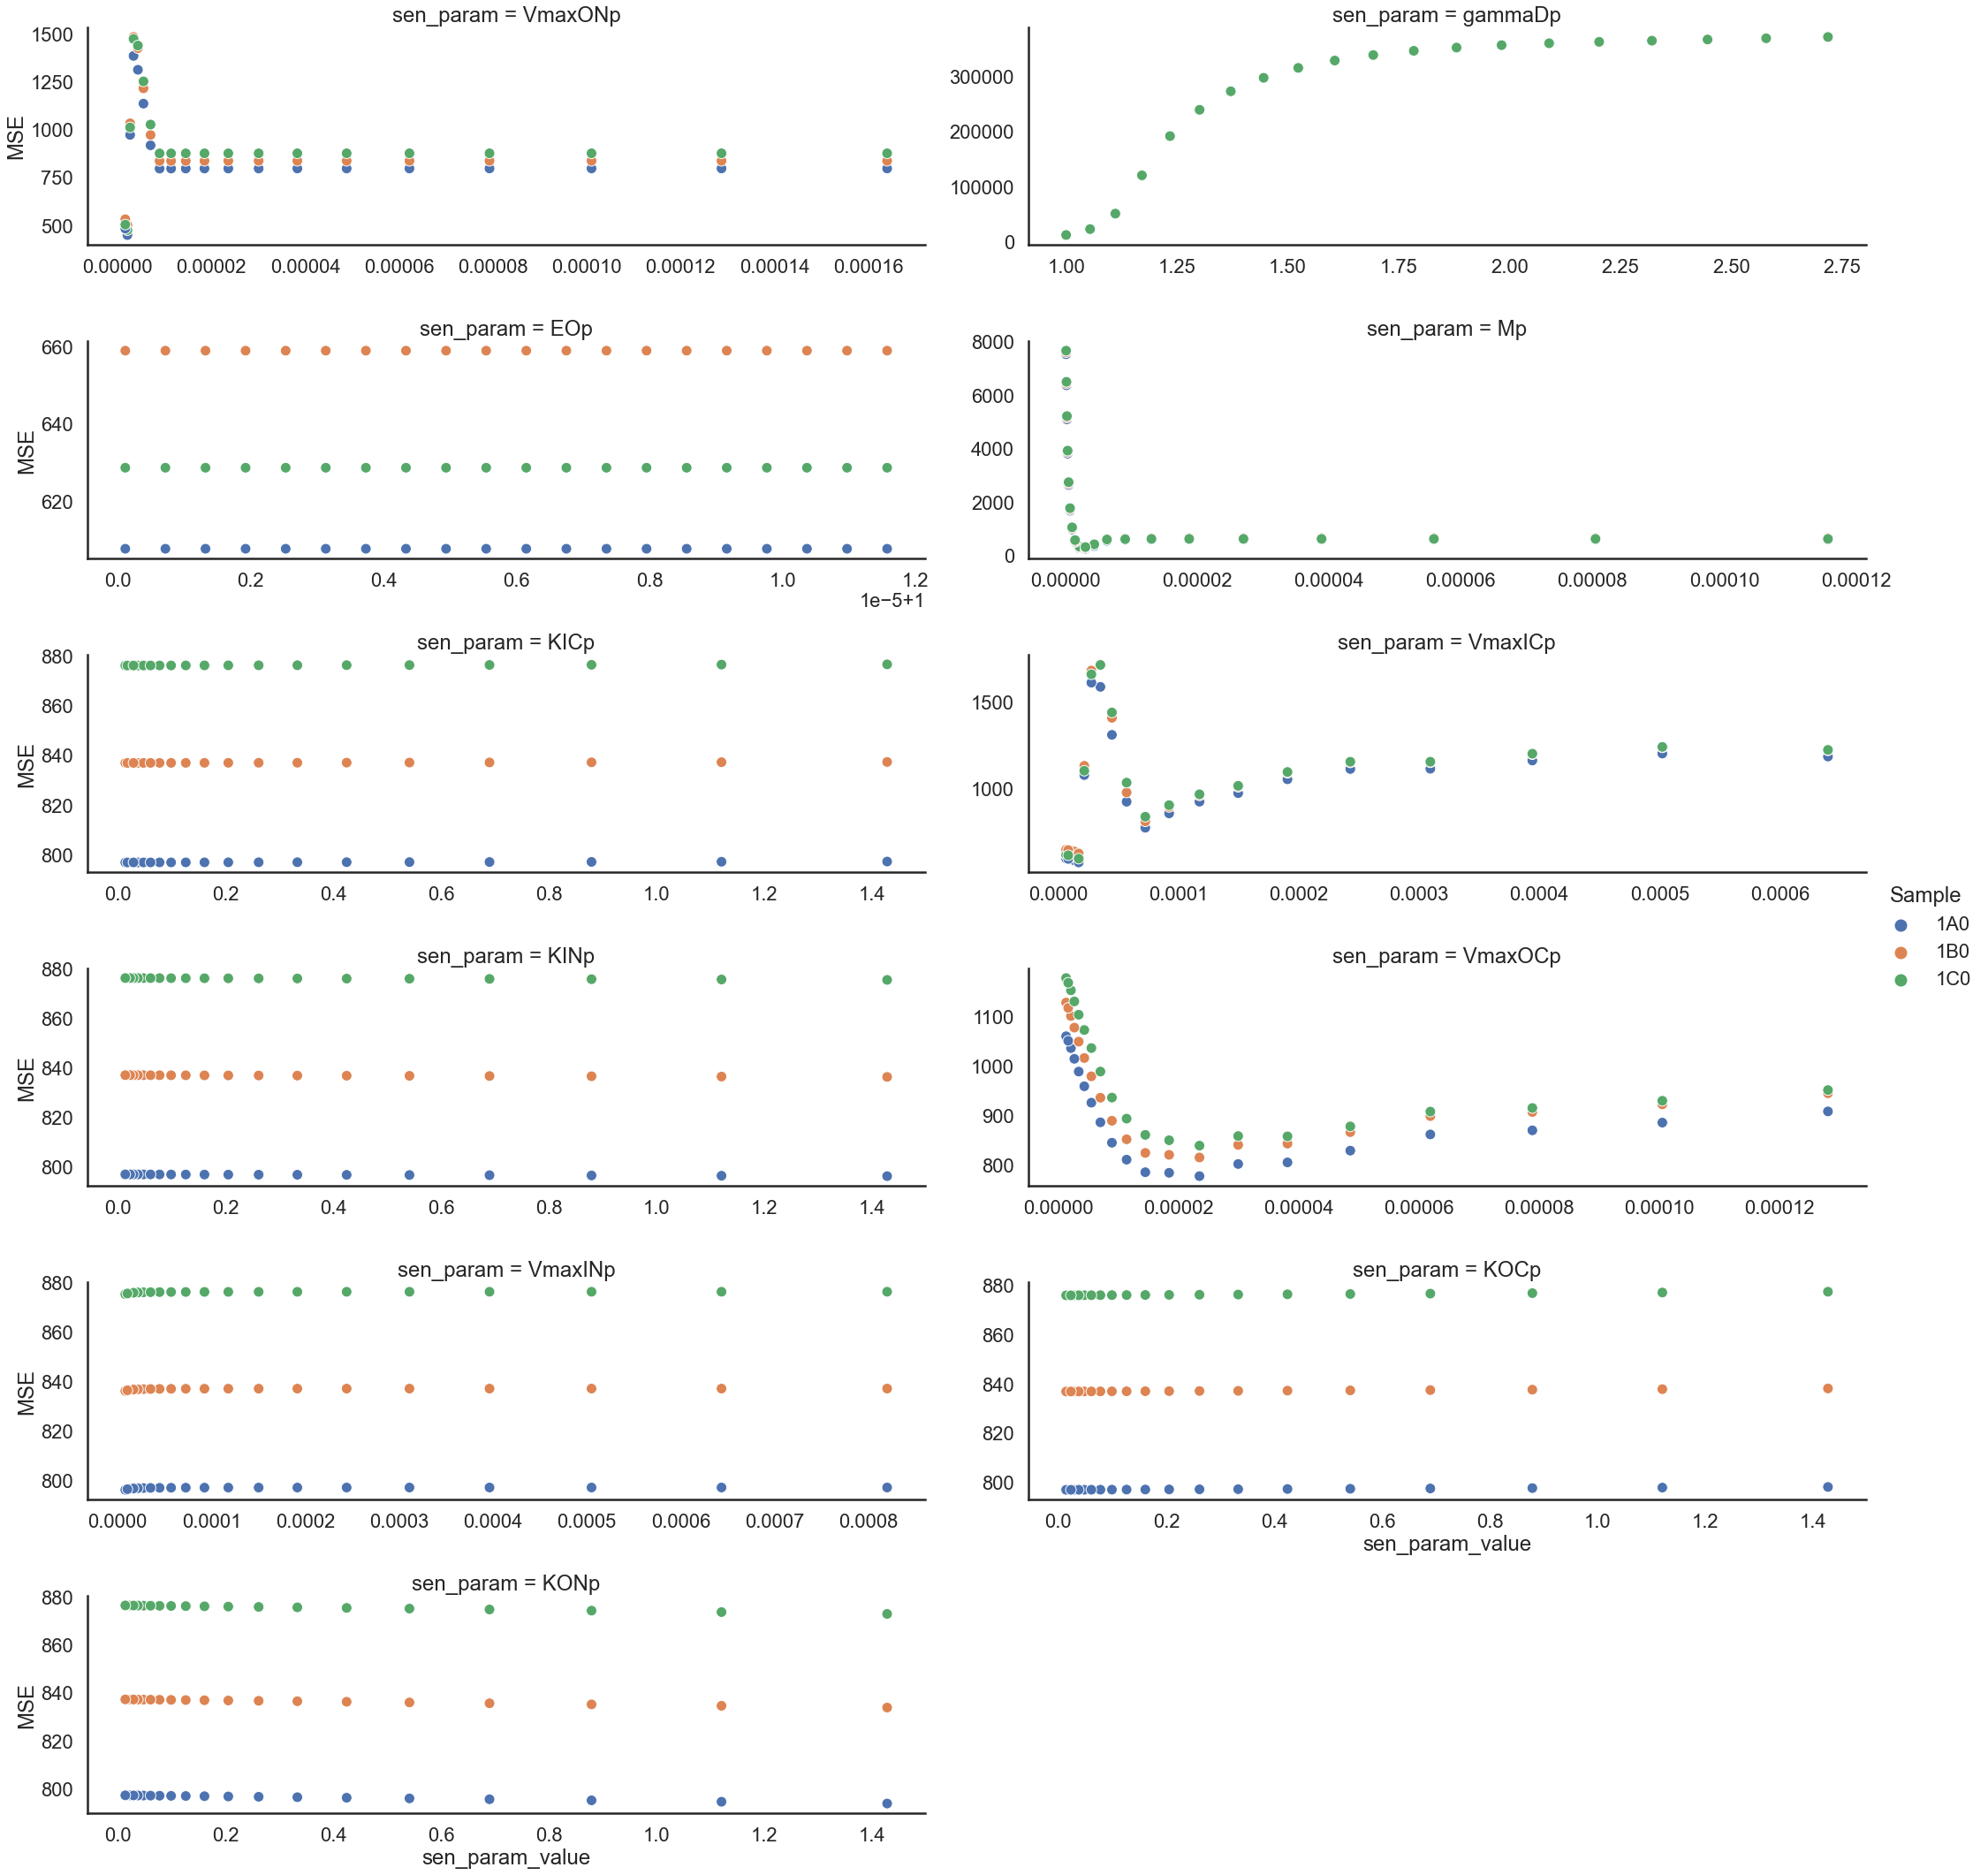

In [77]:
sns.relplot(
    data=mse_df.loc[mse_df.model.isin(['MIXO'])], 
    x='sen_param_value', y='MSE', #log_scale=(True,False), 
    col='sen_param', col_wrap=2,
    hue='Sample', 
    aspect=3,
    facet_kws={'sharey': False, 'sharex': False}, #common_bins=False, 
)#.set(xscale='log')

In [51]:
msefilter_df.sort_values('MSE').groupby('model').head(3).sort_values(['model', 'MSE'])

,sen_param,model,idx,run_id,Sample,id,full name,Group,compare_points,MSE,sen_param_value
1458,VmaxINp,FULL,10,param_sensitivity_ponly_FULL_PRO_FULL_VmaxINp_...,1A0,1,Axenic,Axenic,164.0,114.011222,9.145677e-06
1461,VmaxINp,FULL,11,param_sensitivity_ponly_FULL_PRO_FULL_VmaxINp_...,1A0,1,Axenic,Axenic,164.0,120.944405,1.165411e-05
1459,VmaxINp,FULL,10,param_sensitivity_ponly_FULL_PRO_FULL_VmaxINp_...,1B0,1,Axenic,Axenic,164.0,144.681760,9.145677e-06
1029,Mp,LEAK,0,param_sensitivity_ponly_LEAK_PRO_LEAK_Mp_0_h91...,1A0,1,Axenic,Axenic,164.0,168.004914,1.157407e-07
1032,Mp,LEAK,1,param_sensitivity_ponly_LEAK_PRO_LEAK_Mp_1_h-6...,1A0,1,Axenic,Axenic,164.0,170.950261,1.664873e-07
1065,Mp,LEAK,2,param_sensitivity_ponly_LEAK_PRO_LEAK_Mp_2_h-7...,1A0,1,Axenic,Axenic,164.0,176.579816,2.394836e-07
1578,VmaxINp,MIN,10,param_sensitivity_ponly_MIN_PRO_MIN_VmaxINp_10...,1A0,1,Axenic,Axenic,164.0,162.763092,9.145677e-06
1581,VmaxINp,MIN,11,param_sensitivity_ponly_MIN_PRO_MIN_VmaxINp_11...,1A0,1,Axenic,Axenic,164.0,162.801197,1.165411e-05
1584,VmaxINp,MIN,12,param_sensitivity_ponly_MIN_PRO_MIN_VmaxINp_12...,1A0,1,Axenic,Axenic,164.0,162.828340,1.485054e-05
1641,VmaxINp,MIXO,11,param_sensitivity_ponly_MIXO_PRO_MIXO_VmaxINp_...,1A0,1,Axenic,Axenic,164.0,141.052151,1.165411e-05


In [45]:

msefilter_df.loc[msefilter_df.model.isin(['MIN'])].sort_values(['sen_param','MSE']).to_excel('sensitivity_error.xlsx')

In [46]:
 ((9.1e-9) / 86400) * pro_vol**0.67


In [47]:
0.6 * 1.9e-9 / Qp / seconds_in_day

In [48]:
Qp

In [49]:
# 0.1 N per 1 C per day
0.1*R_P